**Dénes Csala**  
LSE, 2024  

Based on *Elements of Data Science* ([Allen B. Downey](https://allendowney.com), 2021) and *Python Data Science Handbook* ([Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/), 2018)

License: [MIT](https://mit-license.org/)

## Quick Application: Optical Character Recognition

To demonstrate the basi principles on a more interesting problem, let's consider OCR (Optical Character Recognition) – that is, recognizing hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use scikit-learn's set of pre-formatted digits, which is built-in to the library.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# plt.style.available # list of available styles
plt.style.use('seaborn-v0_8-pastel')

### Loading and visualizing the digits data

We'll use scikit-learn's data access interface and take a look at this data:

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [3]:
digits.data.shape

(1797, 64)

Let's plot a few of these:

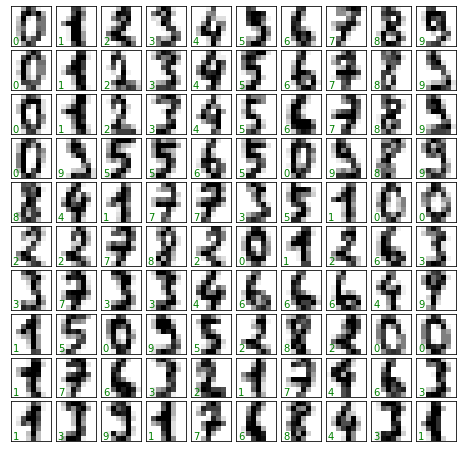

In [4]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Here the data is simply each pixel value within an 8x8 grid:

(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


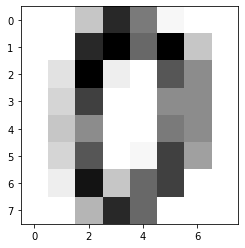

In [5]:
# The images themselves
print(digits.images.shape)
print(digits.images[0])
plt.imshow(digits.images[0],cmap='Greys')

In [7]:
# The data for use in our algorithms
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [9]:
# The target label
print(digits.target)

[0 1 2 ... 8 9 8]


In [10]:
digits.target.shape

(1797,)

So our data have 1797 samples in 64 dimensions.

### Unsupervised Learning: Dimensionality Reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in 64 dimensions!
Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a manifold learning algorithm called *Isomap*, and transform the data to two dimensions.

In [11]:
from sklearn.manifold import Isomap

In [13]:
iso = Isomap(n_components=2) #2 components so that we can plot in 2D space
data_projected = iso.fit_transform(digits.data) #here we called fit and transform in one step. it could have been model.fit(X) and then X_new=model.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [15]:
data_projected.shape

(1797, 2)

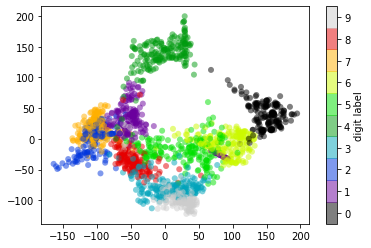

In [16]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

We see here that the digits are fairly well-separated in the parameter space; this tells us that a supervised classification algorithm should perform fairly well. Let's give it a try.

### Classification on Digits

Let's try a classification task on the digits. The first thing we'll want to do is split the digits into a training and testing sample:

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=2)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


Let's use a simple logistic regression which (despite its confusing name) is a classification algorithm:

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


We can check our classification accuracy by comparing the true values of the test set to the predictions:

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9466666666666667

This single number doesn't tell us **where** we've gone wrong: one nice way to do this is to use the *confusion matrix*

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  2  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  1  2  0]
 [ 0  0  0  0 36  0  0  0  3  1]
 [ 0  1  0  0  1 50  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  0  0  0  0  0  0  0 39  1]
 [ 0  0  0  2  0  1  0  0  2 34]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


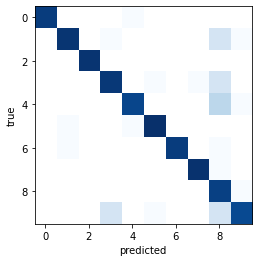

In [23]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

We might also take a look at some of the outputs along with their predicted labels. We'll make the bad labels red:

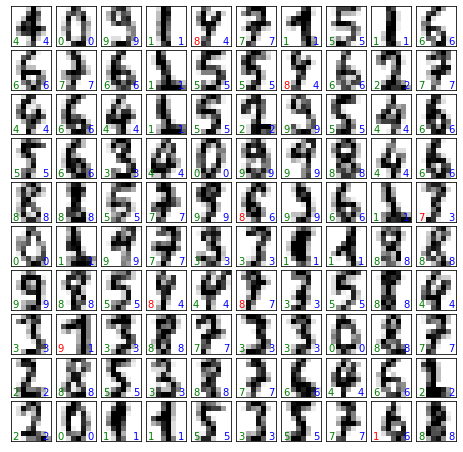

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.text(0.8, 0.05, str(ytest[i]),
            transform=ax.transAxes, color='blue')
    ax.set_xticks([])
    ax.set_yticks([])

The interesting thing is that even with this simple logistic regression algorithm, many of the mislabeled cases are ones that we ourselves might get wrong!

There are many ways to improve this classifier, but we're out of time here. To go further, we could use a more sophisticated model, use cross validation, or apply other techniques.
We'll cover some of these topics later in the tutorial.